<a href="https://colab.research.google.com/github/Mani512996/internship/blob/main/market_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
\
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


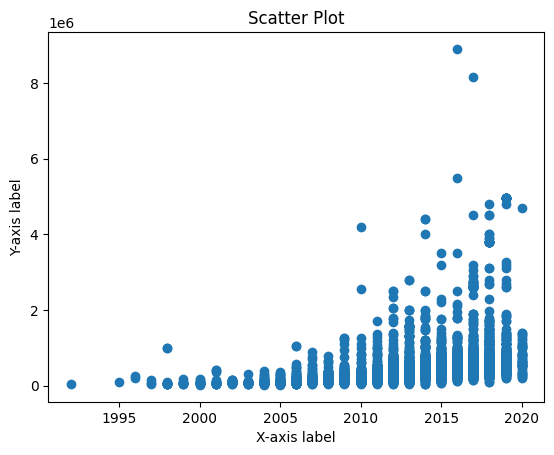

In [ ]:
plt.scatter(df['year'], df['selling_price'])
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Scatter Plot')
plt.show()


In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


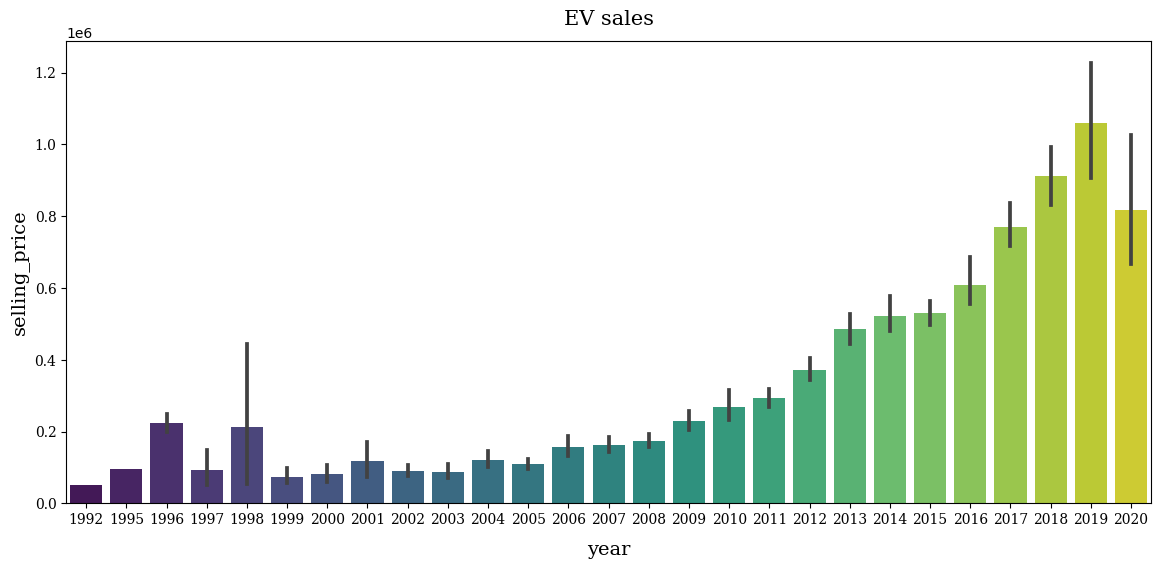

In [ ]:
plt.figure(figsize=(14, 6))
sns.barplot(data=df, y=df['selling_price'].sort_values(ascending=True), x=df['year'], palette='viridis')
plt.ylabel('selling_price', fontsize=14, family='serif')
plt.xlabel('year', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='EV sales', weight=200, family='serif', size=15, pad=12)
plt.show()

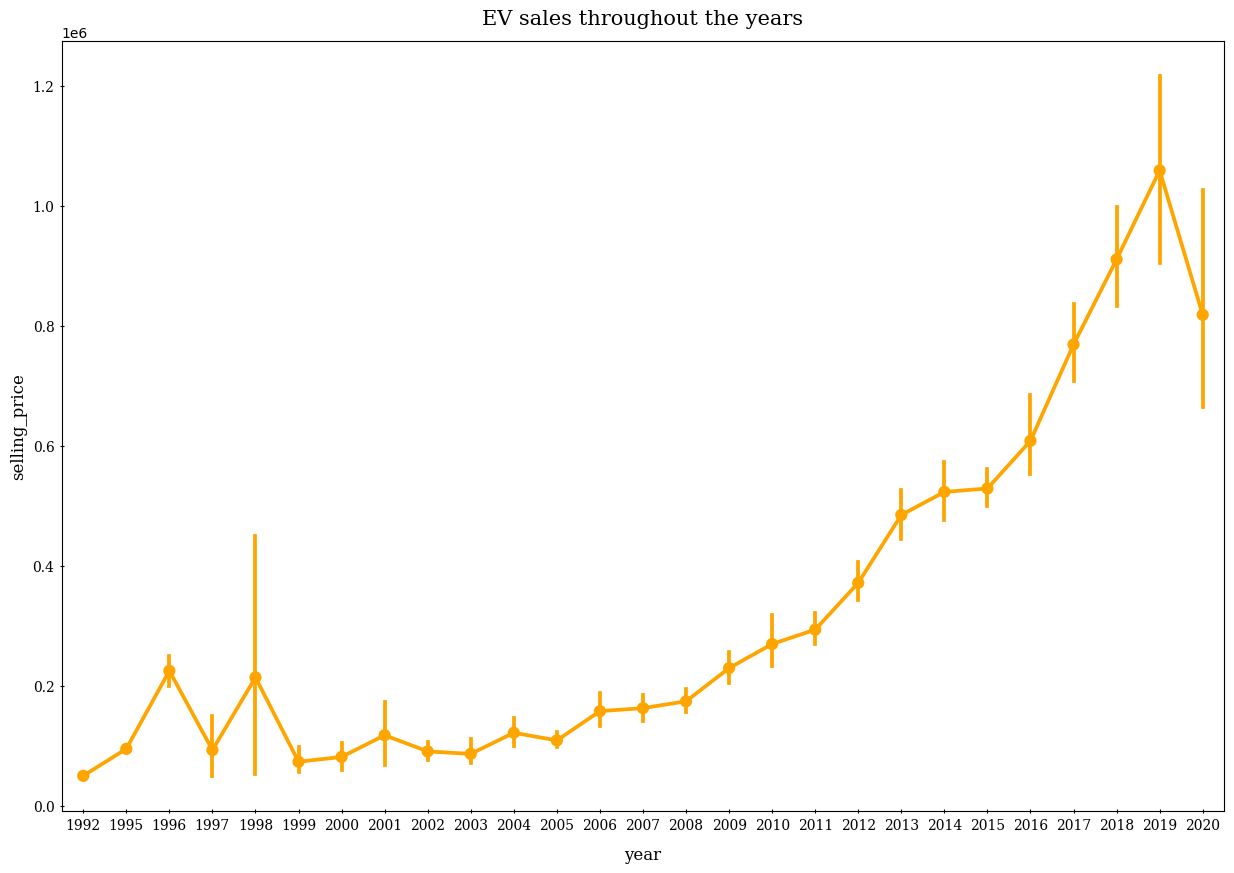

In [ ]:
plt.figure(figsize=(15, 10))
sns.pointplot(data=df, y='selling_price', x='year', color='orange')
plt.xlabel('year', family='serif', size=12, labelpad=10)
plt.ylabel('selling_price', family='serif', size=12)
plt.tick_params(direction='inout')
plt.xticks(family='serif', size=10)
plt.yticks(family='serif', size=10)
plt.title(label='EV sales throughout the years', weight=200, family='serif', size=15, pad=12)
plt.show()

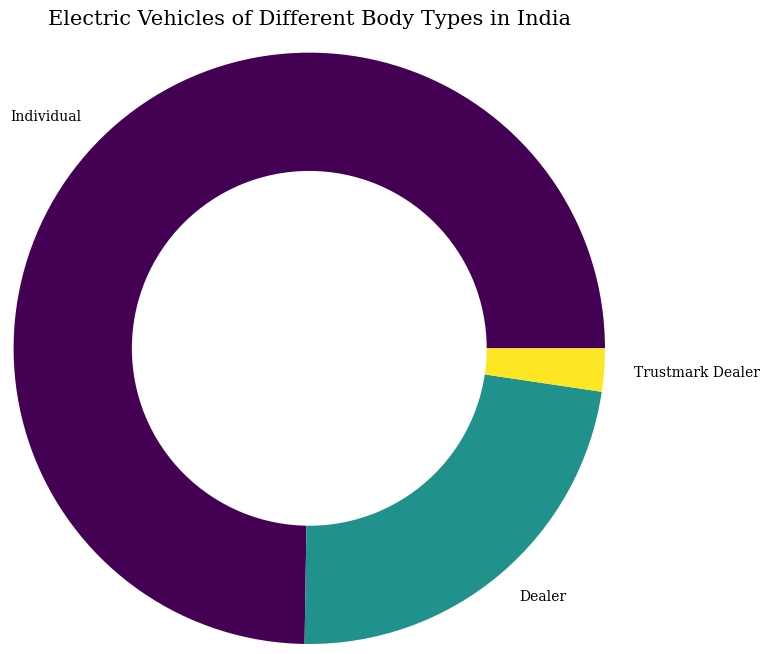

In [ ]:
x = df['seller_type'].value_counts().plot.pie(radius=2, cmap='viridis', startangle=0, textprops=dict(family='serif'))
plt.pie(x=[1], radius=1.2, colors='white')
plt.title(label='Electric Vehicles of Different Body Types in India', family='serif', size=15, pad=100)
plt.ylabel('')
plt.show()

<ipython-input-14-117a71a3a6dc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(), annot=True, cmap='Purples', cbar=False, square=True, fmt='.2f', linewidths=.3)


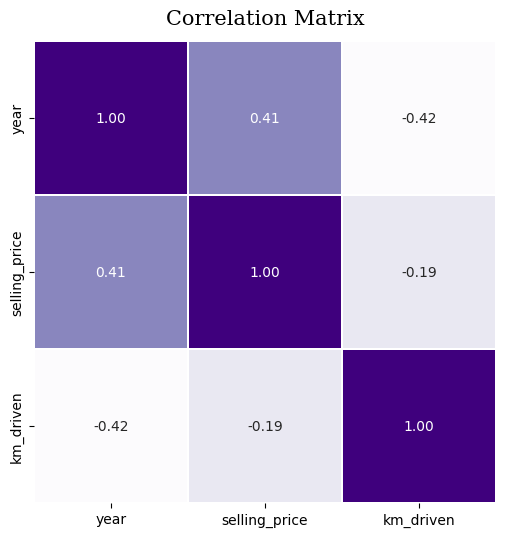

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(data=df.corr(), annot=True, cmap='Purples', cbar=False, square=True, fmt='.2f', linewidths=.3)
plt.title('Correlation Matrix', family='serif', size=15, pad=12);

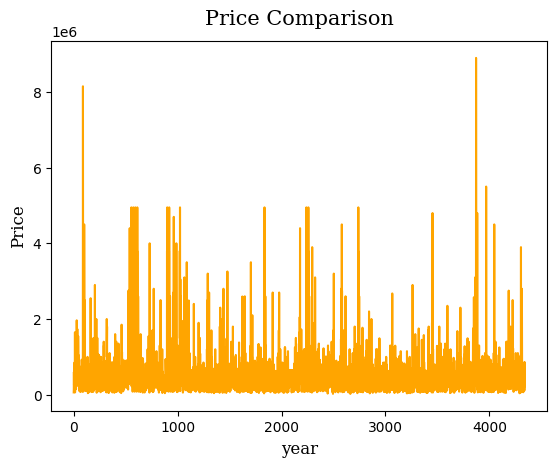

In [ ]:
plt.plot(df['selling_price'], color='orange')
plt.xlabel('year', family='serif', size=12)
plt.ylabel('Price', family='serif', size=12)
plt.title('Price Comparison', family='serif', size=15, pad=12);

In [ ]:
X = df[['selling_price']]


In [ ]:
k = 3  # Number of clusters
n_init = 10  # Number of times the k-means algorithm will be run with different centroid seeds
kmeans = KMeans(n_clusters=k, n_init=n_init)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [ ]:
print(df['selling_price'].unique())


[  60000  135000  600000  250000  450000  140000  550000  240000  850000
  365000  260000 1650000  585000 1195000  390000 1964999 1425000  975000
 1190000  930000  525000 1735000 1375000  900000 1300000 1400000  229999
 1550000 1250000  625000 1050000  560000  290000  275000  411000  150000
  500000  100000  725000  401000  750000  310000  665000  465000  160000
  675000  300000   70000  151000  280000  350000  570000  125000  130000
  925000  200000  248000   80000  650000  495000  371000 1025000 8150000
  325000 1470000 2800000  210000 1150000 4500000 2750000 1975000  175000
 2500000  628000  399000  315000  780000  434000  690000  555000  120000
  165000   95000  800000  840000  490000  400000 1000000  530000   40000
   75000  540000  700000  430000   65000  195000  170000  225000   99000
  620000 2550000  320000  810000  282000   72000  640000  380000 1500000
  434999  190000 2900000  425000  265000  890000  685000  940000  590000
  385000 2000000  235000   52000   89999  180000  2

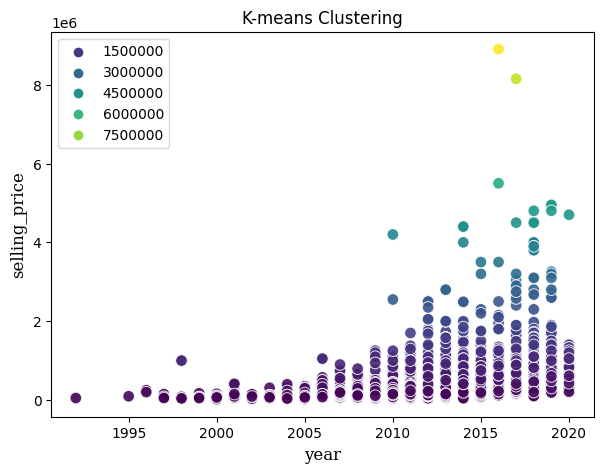

In [ ]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='year', y='selling_price', hue='selling_price', s=70, palette='viridis', zorder=2, alpha=.9)
plt.xlabel('year', family='serif', size=12)
plt.ylabel('selling_price', family='serif', size=12)
plt.title('K-means Clustering')
plt.legend()
plt.show()


